<br>

## **Step 1: Import**

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd

<br>

## **Step 2: Download pickle files**

In [2]:
transform = transforms.Compose([transforms.PILToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=1,
                                          shuffle=False)

testset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       download=True,
                                       transform=transform)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=1,
                                         shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


<br>

## **Step 3: Read pickle file**

In [3]:
pf1 = pd.read_pickle('./data/cifar-10-batches-py/data_batch_1')

In [4]:
type(pf1)

dict

<br>

## **Step 4: Convert dictionary to dataframe**

In [5]:
pf1_df1 = pd.DataFrame(pf1)

ValueError: Per-column arrays must each be 1-dimensional

**Check reason for error**

In [6]:
list(pf1.keys())

['batch_label', 'labels', 'data', 'filenames']

In [7]:
for i in pf1.keys():
    print(i, '\t', len(pf1[i]))

batch_label 	 21
labels 	 10000
data 	 10000
filenames 	 10000


**Remove batch_label which has different length**

In [8]:
del pf1['batch_label']

In [9]:
list(pf1.keys())

['labels', 'data', 'filenames']

In [10]:
pf1_df1 = pd.DataFrame(pf1)

ValueError: Per-column arrays must each be 1-dimensional

**Check reason for error**

In [11]:
pf1['labels'][0:5]

[6, 9, 9, 4, 1]

In [12]:
pf1['data'][0:5]

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       [ 28,  37,  38, ...,  28,  37,  46],
       [170, 168, 177, ...,  82,  78,  80]], dtype=uint8)

**Should not be list of list. All data in one cell, which is not correct.**

In [13]:
pf1['filenames'][0:5]

['leptodactylus_pentadactylus_s_000004.png',
 'camion_s_000148.png',
 'tipper_truck_s_001250.png',
 'american_elk_s_001521.png',
 'station_wagon_s_000293.png']

**Split list of list in data to list**

In [14]:
pf1['data'] = list(pf1['data'])

In [15]:
pf1['data'][0:5]

[array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8),
 array([154, 126, 105, ..., 139, 142, 144], dtype=uint8),
 array([255, 253, 253, ...,  83,  83,  84], dtype=uint8),
 array([28, 37, 38, ..., 28, 37, 46], dtype=uint8),
 array([170, 168, 177, ...,  82,  78,  80], dtype=uint8)]

**Convert to dataframe**

In [16]:
pf1_df1 = pd.DataFrame(pf1)

In [17]:
pf1_df1

,labels,data,filenames
0,6,"[59, 43, 50, 68, 98, 119, 139, 145, 149, 149, ...",leptodactylus_pentadactylus_s_000004.png
1,9,"[154, 126, 105, 102, 125, 155, 172, 180, 142, ...",camion_s_000148.png
2,9,"[255, 253, 253, 253, 253, 253, 253, 253, 253, ...",tipper_truck_s_001250.png
3,4,"[28, 37, 38, 42, 44, 40, 40, 24, 32, 43, 30, 3...",american_elk_s_001521.png
4,1,"[170, 168, 177, 183, 181, 177, 181, 184, 189, ...",station_wagon_s_000293.png
...,...,...,...
9995,3,"[18, 18, 21, 23, 24, 23, 24, 25, 22, 19, 18, 1...",tabby_s_002228.png
9996,9,"[235, 240, 249, 253, 254, 253, 254, 254, 179, ...",truck_s_000036.png
9997,1,"[71, 60, 74, 73, 87, 125, 179, 231, 250, 252, ...",car_s_002296.png
9998,1,"[250, 254, 211, 64, 61, 60, 55, 54, 55, 59, 65...",estate_car_s_001433.png


<br>

## **Step 5: Reshape tensor form of image**

**Check shape of data for picture**

In [18]:
pf1_df1.loc[0,'data']

array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)

In [19]:
pf1_df1.loc[0,'data'].shape

(3072,)

**Shape is wrong. Shape should be 3 x 32 x 32.**

**Convert data for picture to tensor with 3 channels**

In [20]:
pf1_df1['data'] = pf1_df1['data'].apply(lambda x: torch.from_numpy(np.array(x).reshape(3,32,32)))

In [21]:
pf1_df1.loc[0,'data']

tensor([[[ 59,  43,  50,  ..., 158, 152, 148],
         [ 16,   0,  18,  ..., 123, 119, 122],
         [ 25,  16,  49,  ..., 118, 120, 109],
         ...,
         [208, 201, 198,  ..., 160,  56,  53],
         [180, 173, 186,  ..., 184,  97,  83],
         [177, 168, 179,  ..., 216, 151, 123]],

        [[ 62,  46,  48,  ..., 132, 125, 124],
         [ 20,   0,   8,  ...,  88,  83,  87],
         [ 24,   7,  27,  ...,  84,  84,  73],
         ...,
         [170, 153, 161,  ..., 133,  31,  34],
         [139, 123, 144,  ..., 148,  62,  53],
         [144, 129, 142,  ..., 184, 118,  92]],

        [[ 63,  45,  43,  ..., 108, 102, 103],
         [ 20,   0,   0,  ...,  55,  50,  57],
         [ 21,   0,   8,  ...,  50,  50,  42],
         ...,
         [ 96,  34,  26,  ...,  70,   7,  20],
         [ 96,  42,  30,  ...,  94,  34,  34],
         [116,  94,  87,  ..., 140,  84,  72]]], dtype=torch.uint8)

In [22]:
pf1_df1.loc[0,'data'].shape

torch.Size([3, 32, 32])

**Size is correct because 3 channels x 32 cells height x 32 cells width = 3072**

<br>

## **Step 6: Show some pictures**

**Filename = leptodactylus_pentadactylus = Smoky Jungle Frog**

In [23]:
pf1_df1.loc[0,'filenames']

'leptodactylus_pentadactylus_s_000004.png'

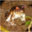

In [24]:
transform_image = transforms.ToPILImage()
image_output_1 = transform_image(pf1_df1.loc[0,'data'])
image_output_1

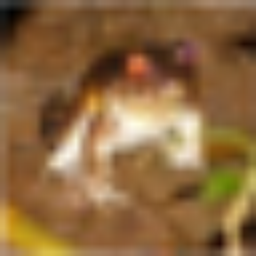

In [25]:
# Expand to see better

new_size = torchvision.transforms.Resize((256,256))
image_output_2 = new_size(image_output_1)
image_output_2

**Filename = sea_boat**

In [26]:
pf1_df1.loc[8,'filenames']

'sea_boat_s_001584.png'

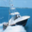

In [27]:
image_output_3 = transform_image(pf1_df1.loc[8,'data'])
image_output_3

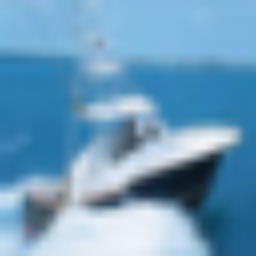

In [28]:
# Expand to see better

image_output_4 = new_size(image_output_3)
image_output_4